In [238]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.utils import class_weight

In [239]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
#from keras.preprocessing import sequence
#from keras.initializers import glorot_uniform
np.random.seed(1)

In [240]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(epochs, loss, val_loss):
    plt.figure(figsize=(10, 7))
    plt.plot(np.arange(epochs), loss, label='loss')
    plt.plot(np.arange(epochs), val_loss, label='val_loss')
    plt.legend()
    plt.grid(True)

In [241]:
def calculation_classes(y, y_test = None):
    print ('\t\tTRAIN DATA\tTEST DATA')
    print ('Negative\t', np.sum(y==0),'  ',
           round(100*np.sum(y==0)/y.shape[0],2),'%',
           '\t',np.sum(y_test==0),'  ',
           round(100*np.sum(y_test==0)/y_test.shape[0],2),'%'
           '\nPositive\t ', np.sum(y==1),' ',
           round(100*np.sum(y==1)/y.shape[0],2),'%'
           '\t',np.sum(y_test==1),' ',
           round(100*np.sum(y_test==1)/y_test.shape[0],2),'%'
      )

In [242]:
def model(input_shape, Ty):
    i = Input(shape=input_shape, dtype='float32')
    X = LSTM(32, return_sequences=False)(i)
    X = Dense(Ty, activation='sigmoid')(X)
    #X = Activation('softmax')(X)
    model = Model(inputs=[i], outputs=X)
    
    return model
    


# Import data sets

In [253]:
data_train = pd.read_csv('sources/train.csv')
data_test = pd.read_csv('sources/test.csv')

In [254]:
X = data_train.drop(['Y'], axis='columns').values
y = data_train['Y'].values

X_train,X_dev,y_train,y_dev = train_test_split(X, y, test_size=0.2, \
                                               random_state=227, shuffle=True, stratify=y)
X_test = data_test.values
print(len(X_test))


class_weights_train = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y), y)
#print(class_weights_train)
calculation_classes(y, y_dev)

1579
		TRAIN DATA	TEST DATA
Negative	 1000    90.01 % 	 201    90.13 %
Positive	  111   9.99 %	 22   9.87 %


In [255]:
ss = StandardScaler()

X = ss.fit_transform(X)
X_train = ss.fit_transform(X_train)
X_dev = ss.transform(X_dev)

X_test = ss.transform(X_test)


In [256]:
X = np.expand_dims(X, axis=2)
X_train = np.expand_dims(X_train, axis=2)
X_dev = np.expand_dims(X_dev, axis=2)

X_test = np.expand_dims(X_test, axis=2)

# NN on train/dev sets

In [247]:
Tx=  6
Ty = 1

In [222]:
epochs = 100
batch_size = 16

LSTM_model = model((Tx,1),Ty)
#LSTM_model.summary()
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
logs = LSTM_model.fit(X_train, y_train , epochs=epochs, batch_size=batch_size, shuffle=True,\
               validation_data=(X_dev, y_dev), verbose=0, class_weight=class_weights_train)

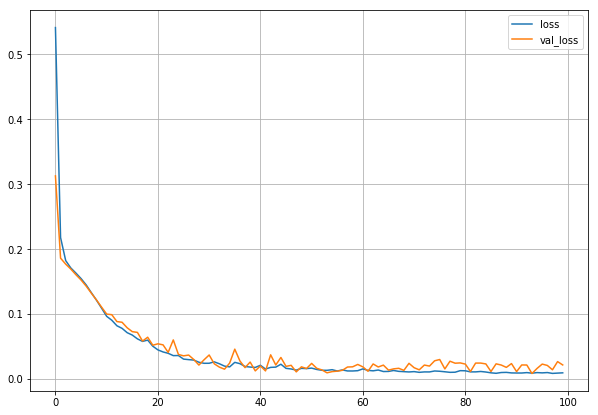

In [223]:
plot_loss(epochs, logs.history.get('loss'), logs.history.get('val_loss'))

# Final fit NN on all train set

In [248]:
epochs = 50

LSTM_model = model((Tx,1),Ty)
#LSTM_model.summary()
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model.fit(X, y , epochs=epochs, batch_size=batch_size, shuffle=True,\
               verbose=0, class_weight=class_weights)
LSTM_model.save_weights('sources/LSTM_sequence_weights.h5')

In [233]:
train_preds = LSTM_model.predict(X)

In [ ]:
for i in range(X.shape[0]):
    if train_preds[i] > 0.5:
        print(i)

In [257]:
test_preds = LSTM_model.predict(X_test)

In [258]:
for i in range(X_test.shape[0]):
    if test_preds[i] > 0.5:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
